# Prepare Mexican Census Data for Data Analysis

In [1]:
import pandas as pd

## Read Mexican Census Education Data

Skip rows with comments at the begining (row 0 - 2) and the end (rows 37 - 44).

In [2]:
df = pd.read_excel('../data/Educacion_01.xlsx', skiprows = list(range(0, 3)) + list(range(37, 45)))

In [3]:
df.head()

,Entidad federativa,Total,Sabe leer y escribir,No sabe leer y escribir,No especificado
0,Estados Unidos Mexicanos,19529018,17554529,1871713,102776
1,Aguascalientes,234498,216002,17770,726
2,Baja California,553060,495977,52605,4478
3,Baja California Sur,121220,107786,12780,654
4,Campeche,145473,129890,14959,624


### Prepare data

Replace field names with new names without spaces.

In [4]:
df.rename(columns={'Entidad federativa': 'state', 'Sabe leer y escribir': 'read_write', 'No sabe leer y escribir': 'not_read_write', 'No especificado': 'not_specified'}, inplace=True)

Remove values for the country level.

In [5]:
df.query('state != "Estados Unidos Mexicanos"', inplace=True)

Make state names upper case to enable merging with case and death data.

In [6]:
df['state'] = df['state'].str.upper()

In [7]:
df.head()

,state,Total,read_write,not_read_write,not_specified
1,AGUASCALIENTES,234498,216002,17770,726
2,BAJA CALIFORNIA,553060,495977,52605,4478
3,BAJA CALIFORNIA SUR,121220,107786,12780,654
4,CAMPECHE,145473,129890,14959,624
5,COAHUILA DE ZARAGOZA,486221,445183,39038,2000


In [8]:
df['pct_read_write'] = df['read_write']/df['Total']*100
df['pct_not_read_write'] = df['not_read_write']/df['Total']*100

In [9]:
df.head()

,state,Total,read_write,not_read_write,not_specified,pct_read_write,pct_not_read_write
1,AGUASCALIENTES,234498,216002,17770,726,92.112513,7.577890
2,BAJA CALIFORNIA,553060,495977,52605,4478,89.678697,9.511626
3,BAJA CALIFORNIA SUR,121220,107786,12780,654,88.917670,10.542815
4,CAMPECHE,145473,129890,14959,624,89.288047,10.283008
5,COAHUILA DE ZARAGOZA,486221,445183,39038,2000,91.559805,8.028859


In [10]:
df.head()

,state,Total,read_write,not_read_write,not_specified,pct_read_write,pct_not_read_write
1,AGUASCALIENTES,234498,216002,17770,726,92.112513,7.577890
2,BAJA CALIFORNIA,553060,495977,52605,4478,89.678697,9.511626
3,BAJA CALIFORNIA SUR,121220,107786,12780,654,88.917670,10.542815
4,CAMPECHE,145473,129890,14959,624,89.288047,10.283008
5,COAHUILA DE ZARAGOZA,486221,445183,39038,2000,91.559805,8.028859


In [11]:
df[['pct_read_write', 'pct_not_read_write']].describe()
# https://www.simplypsychology.org/boxplots.html

,pct_read_write,pct_not_read_write
count,32.000000,32.000000
mean,89.953656,9.575914
std,2.241227,2.293174
min,80.801686,6.517517
25%,89.168267,8.004238
50%,90.080843,9.431692
75%,91.573252,10.332385
max,92.839593,18.898393


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


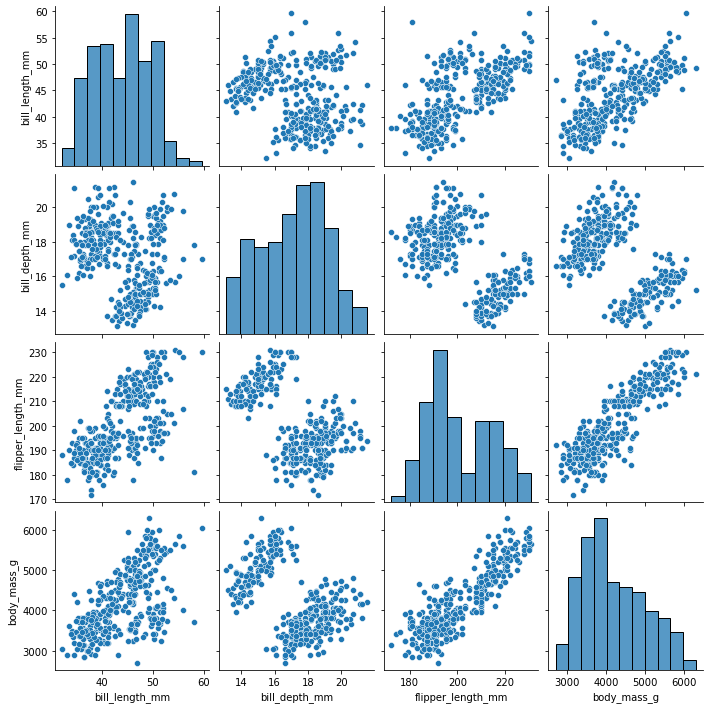

In [12]:
import seaborn as sns
# penguins = sns.load_dataset("penguins")
# sns.pairplot(penguins)
# penguins.head()

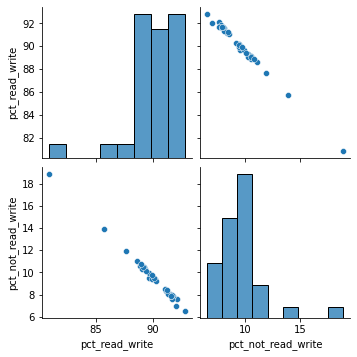

In [13]:
sns.pairplot(df[['pct_read_write', 'pct_not_read_write']]);

In [14]:
df.head()

,state,Total,read_write,not_read_write,not_specified,pct_read_write,pct_not_read_write
1,AGUASCALIENTES,234498,216002,17770,726,92.112513,7.577890
2,BAJA CALIFORNIA,553060,495977,52605,4478,89.678697,9.511626
3,BAJA CALIFORNIA SUR,121220,107786,12780,654,88.917670,10.542815
4,CAMPECHE,145473,129890,14959,624,89.288047,10.283008
5,COAHUILA DE ZARAGOZA,486221,445183,39038,2000,91.559805,8.028859


In [15]:
df[['pct_read_write', 'pct_not_read_write']].head()

,pct_read_write,pct_not_read_write
1,92.112513,7.577890
2,89.678697,9.511626
3,88.917670,10.542815
4,89.288047,10.283008
5,91.559805,8.028859


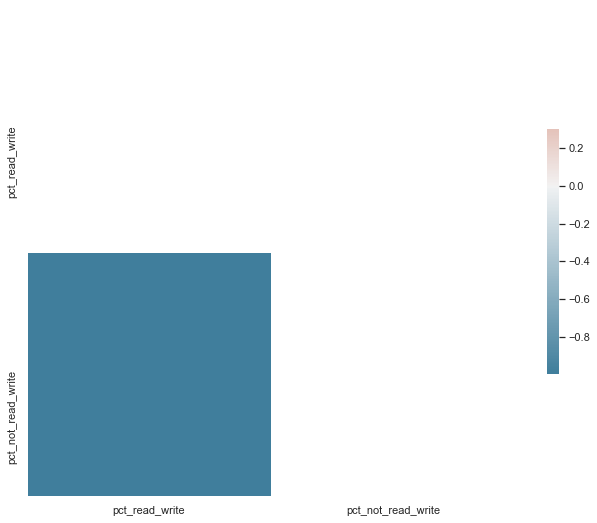

In [16]:
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df[['pct_read_write', 'pct_not_read_write']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});